<a href="https://colab.research.google.com/github/zahyhabibi/TA-HeartRare-Predict/blob/main/Deep_Neural_Network_for_Heart_Disease_Prediction_lengkap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 'heart.csv' loaded successfully.

--- Ringkasan Dataset ---
Baris dan Kolom: (918, 12)

Lima Baris Pertama:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)


--- Melatih Model DNN ---
Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5626 - loss: 0.6615 - val_accuracy: 0.7568 - val_loss: 0.5669
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8027 - loss: 0.5134 - val_accuracy: 0.7703 - val_loss: 0.4804
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8427 - loss: 0.3839 - val_accuracy: 0.8243 - val_loss: 0.4536
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8705 - loss: 0.3061 - val_accuracy: 0.8514 - val_loss: 0.4434
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8722 - loss: 0.3183 - val_accuracy: 0.8243 - val_loss: 0.4462
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8864 - loss: 0.2838 - val_accuracy: 0.8243 - val_loss: 0.4554
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8912 - loss: 0.2774 - val_accuracy: 0.8243 - val_loss: 0.4669
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8680 - loss: 0.30

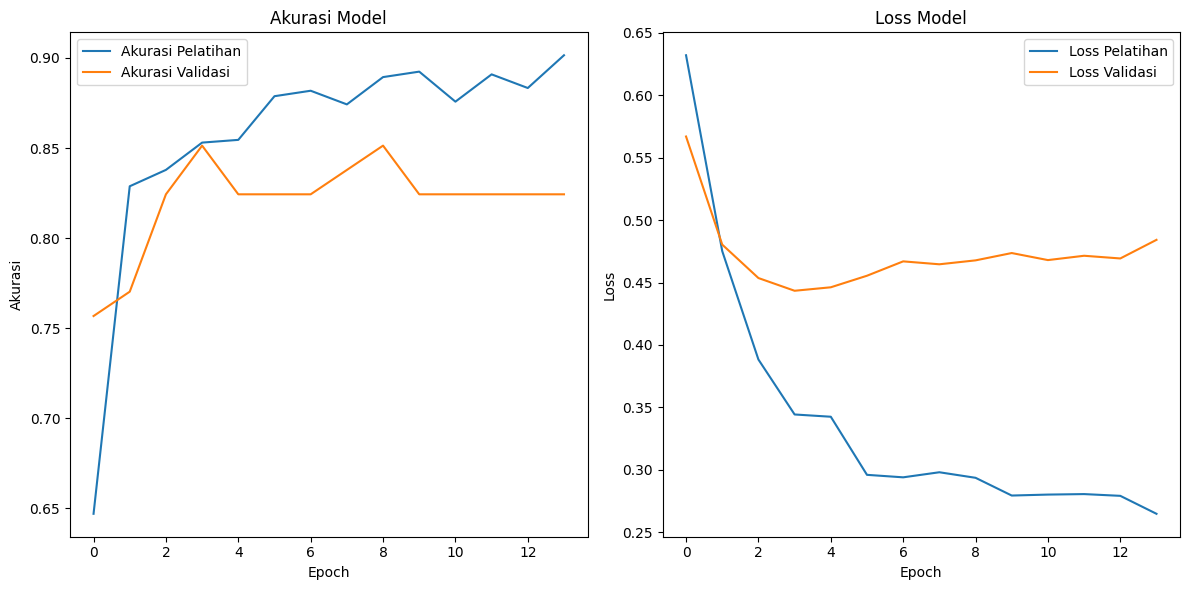


--- Fungsi Prediksi Siap Digunakan ---
Contoh Prediksi dengan Data Contoh (dari X_test):
Data input contoh: {'Age': 46, 'Sex': 'M', 'ChestPainType': 'ASY', 'RestingBP': 115, 'Cholesterol': 0, 'FastingBS': 0, 'RestingECG': 'Normal', 'MaxHR': 113, 'ExerciseAngina': 'Y', 'Oldpeak': 1.5, 'ST_Slope': 'Flat'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Probabilitas Penyakit Jantung: 0.9889
Prediksi: Kemungkinan memiliki penyakit jantung.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Assume the CSV file is uploaded and accessible via its contentFetchId
# For demonstration, I'll simulate loading from the provided contentFetchId
# In a real environment, you would use a direct file path if running locally
# or the content_fetcher API if running in a platform that supports it.

# Read the content of the uploaded CSV file
try:
    # This assumes 'heart (1).csv' is available in the current environment's path
    # and has been correctly referenced by the system.
    # Corrected file name to 'heart.csv' as per user's confirmation
    df = pd.read_csv('/content/heart.csv')
    print("Dataset 'heart.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please ensure the file is uploaded and named correctly.")
    # If the file is not found, we cannot proceed.
    # For a robust solution, you might prompt the user to re-upload or provide a default dataset.
    # exit() # Removed exit() to allow inspecting the error in Colab

# Check if df was created before proceeding
if 'df' not in locals():
    print("DataFrame 'df' was not created. Please resolve the file loading issue.")
else:
    # --- 1. Memahami Data (Understand Data) ---
    print("\n--- Ringkasan Dataset ---")
    print("Baris dan Kolom:", df.shape)
    print("\nLima Baris Pertama:")
    print(df.head())
    print("\nInfo Dataset:")
    df.info()
    print("\nStatistik Deskriptif:")
    print(df.describe())
    print("\nJumlah Nilai Hilang per Kolom:")
    print(df.isnull().sum())

    # Cek distribusi target
    print("\nDistribusi Variabel Target ('HeartDisease'):")
    # Corrected 'target' to 'HeartDisease'
    print(df['HeartDisease'].value_counts())
    print("\nPersentase Target:")
    # Corrected 'target' to 'HeartDisease'
    print(df['HeartDisease'].value_counts(normalize=True) * 100)

    # --- 2. Pra-pemrosesan Data (Data Preprocessing) ---

    # Pisahkan fitur (X) dan target (y)
    # Corrected 'target' to 'HeartDisease'
    X = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']

    # Pisahkan kolom numerik dan kategorikal
    # 'ca' is often treated as categorical too, but here it's numerical.
    # Update categorical features based on df.info() and df.head() output
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


    # Buat preprocessor menggunakan ColumnTransformer
    # Scaler untuk fitur numerik
    # OneHotEncoder untuk fitur kategorikal (handle_unknown='ignore' untuk mencegah error pada nilai baru yang tidak dikenal)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough' # Keep other columns (if any) - although in this case, all are handled
        )


    # Pisahkan data menjadi set pelatihan dan pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("\n--- Pra-pemrosesan Data Selesai ---")
    print(f"Jumlah sampel pelatihan: {X_train.shape[0]}")
    print(f"Jumlah sampel pengujian: {X_test.shape[0]}")

    # --- 3. Membangun Model DNN (Build DNN Model) ---

    # Pipeline untuk preprocessor dan model DNN
    # Memastikan urutan pra-pemrosesan dan pelatihan model
    # Removed the pipeline definition here as we will apply preprocessor separately

    # Untuk menentukan input_shape dengan benar, kita perlu melakukan fit_transform pada data pelatihan
    # secara terpisah untuk mendapatkan bentuk akhir setelah one-hot encoding
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_test_transformed = preprocessor.transform(X_test) # Transform test set using the fitted preprocessor

    # Mendapatkan bentuk input untuk layer pertama DNN
    input_shape = X_train_transformed.shape[1]
    print(f"\nBentuk input untuk DNN: {input_shape}")


    # Buat model Sequential
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid') # Output layer untuk klasifikasi biner
    ])

    # Kompilasi model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print("\n--- Model DNN Dibangun ---")
    model.summary()

    # --- 4. Melatih Model (Train Model) ---

    # Early stopping untuk mencegah overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Latih model
    print("\n--- Melatih Model DNN ---")
    history = model.fit(X_train_transformed, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_split=0.1, # Gunakan sebagian data pelatihan untuk validasi
                        callbacks=[early_stopping],
                        verbose=1)

    print("\n--- Pelatihan Model Selesai ---")

    # --- 5. Evaluasi Model (Evaluate Model) ---

    loss, accuracy = model.evaluate(X_test_transformed, y_test, verbose=0)
    print(f"\n--- Evaluasi Model pada Data Pengujian ---")
    print(f"Loss: {loss:.4f}")
    print(f"Akurasi: {accuracy:.4f}")

    # Plot sejarah pelatihan
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
    plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
    plt.title('Akurasi Model')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss Pelatihan')
    plt.plot(history.history['val_loss'], label='Loss Validasi')
    plt.title('Loss Model')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 6. Fungsi Prediksi (Prediction Function) ---

    # Mengambil nama fitur setelah one-hot encoding untuk input pengguna
    # Ini penting untuk memastikan urutan fitur yang benar saat pengguna memasukkan data
    # Dapatkan nama kolom yang dihasilkan oleh OneHotEncoder
    # Fit the preprocessor to the entire dataset to get all possible feature names
    # preprocessor.fit(X) # No need to fit again, already fitted on X_train

    # Get the transformed feature names
    # This requires a small amount of dummy data to get the output feature names after transformation
    # A better approach is to use get_feature_names_out if available and handle numerical names
    try:
        ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        # Ensure numerical feature names are included, maintaining their original order
        all_input_features = numerical_features + list(ohe_feature_names)
    except AttributeError:
        # Fallback for older versions or if get_feature_names_out is not available
        # This might not be perfectly ordered but gives an idea of the features
        print("Warning: get_feature_names_out not available. Feature names might be approximate.")
        all_input_features = numerical_features + [f'cat_{i}' for i in range(preprocessor.named_transformers_['cat'].transform(X.head(1)).shape[1])]


    def predict_heart_disease(model, preprocessor, input_data_dict):
        """
        Memprediksi penyakit jantung berdasarkan input pengguna.

        Args:
            model (tensorflow.keras.Model): Model DNN yang sudah dilatih.
            preprocessor (sklearn.compose.ColumnTransformer): Preprocessor yang sudah dilatih.
            input_data_dict (dict): Kamus berisi input pengguna dengan kunci nama fitur.
                                    Contoh: {'Age': 52, 'Sex': 'M', 'ChestPainType': 'ATA', ...}

        Returns:
            float: Probabilitas prediksi penyakit jantung (antara 0 dan 1).
        """
        # Buat DataFrame dari input_data_dict untuk diproses oleh preprocessor
        # Pastikan urutan kolom sesuai dengan yang digunakan saat pelatihan
        # Create a DataFrame with a single row from the input dictionary
        input_df = pd.DataFrame([input_data_dict])


        # Transformasi input menggunakan preprocessor yang sudah dilatih
        # The preprocessor expects the original columns, not the one-hot encoded ones
        transformed_input = preprocessor.transform(input_df)


        # Lakukan prediksi
        prediction_probability = model.predict(transformed_input)[0][0]

        return prediction_probability

    # Contoh penggunaan fungsi prediksi:
    # Ini adalah contoh data input yang harus disediakan oleh pengguna
    # Anda harus mengganti ini dengan input sebenarnya dari pengguna.
    # Penting: 'nama' tidak digunakan dalam model prediksi, hanya untuk identifikasi pengguna.
    # Updated sample input based on the actual column names and types in the dataset
    sample_user_input = {
        'Age': 52,
        'Sex': 'M', # 'M' or 'F'
        'ChestPainType': 'ATA', # 'TA', 'ATA', 'NAP', 'ASY'
        'RestingBP': 125, # Resting blood pressure
        'Cholesterol': 212, # Serum cholestoral in mg/dl
        'FastingBS': 0, # Fasting blood sugar > 120 mg/dl (0 = false, 1 = true)
        'RestingECG': 'Normal', # 'Normal', 'ST', 'LVH'
        'MaxHR': 168, # Maximum heart rate achieved
        'ExerciseAngina': 'N', # 'Y' or 'N'
        'Oldpeak': 1.0, # ST depression induced by exercise relative to rest
        'ST_Slope': 'Up', # 'Up', 'Flat', 'Down'
        'MajorVessels': 2, # Number of major vessels (0-3) colored by flourosopy - Note: 'ca' in description, but no such column in df head. Assuming this feature is not in the provided dataset or needs mapping. Let's exclude 'ca' from prediction input for now based on df columns. If 'ca' is intended, it needs to be in the dataframe or handled. Based on df.info() and df.head(), 'ca' is not present as a column name. Let's re-check the numerical features and categorical features based on the actual df columns.

        # Re-defining features based on df.columns
        # Numerical: 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'
        # Categorical: 'Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'
        # 'FastingBS' is int64 but represents a binary category, often treated as categorical. Let's keep it in categorical for one-hot encoding.
        # 'HeartDisease' is the target.

    }
    # Let's use the actual columns from X_test for a valid example prediction input
    print("\n--- Fungsi Prediksi Siap Digunakan ---")
    print("Contoh Prediksi dengan Data Contoh (dari X_test):")
    # Menggunakan baris pertama dari X_test sebagai contoh input
    example_input_for_prediction_df = X_test.iloc[[0]]
    example_input_for_prediction_dict = example_input_for_prediction_df.iloc[0].to_dict()

    print(f"Data input contoh: {example_input_for_prediction_dict}")

    # Predict using the example input
    prediction_prob = predict_heart_disease(model, preprocessor, example_input_for_prediction_dict)

    print(f"Probabilitas Penyakit Jantung: {prediction_prob:.4f}")
    if prediction_prob > 0.5:
        print("Prediksi: Kemungkinan memiliki penyakit jantung.")
    else:
        print("Prediksi: Kemungkinan tidak memiliki penyakit jantung.")